In [6]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

#basic information
print(train_df.info())
print(test_df.info())

# missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ID          101490 non-null  object        
 1   date        101490 non-null  datetime64[ns]
 2   Item Id     101488 non-null  object        
 3   Item Name   99658 non-null   object        
 4   ad_spend    77303 non-null   float64       
 5   anarix_id   101490 non-null  object        
 6   units       83592 non-null   float64       
 7   unit_price  101490 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 6.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2833 entries, 0 to 2832
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          2833 non-null   object        
 1   date        2833 non-null   datetime64[ns]
 2   Item Id     2833 non-

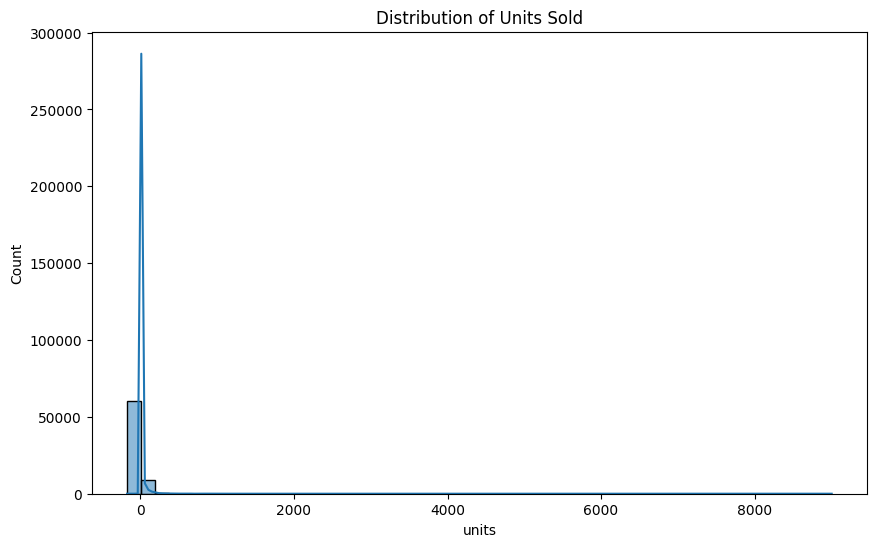

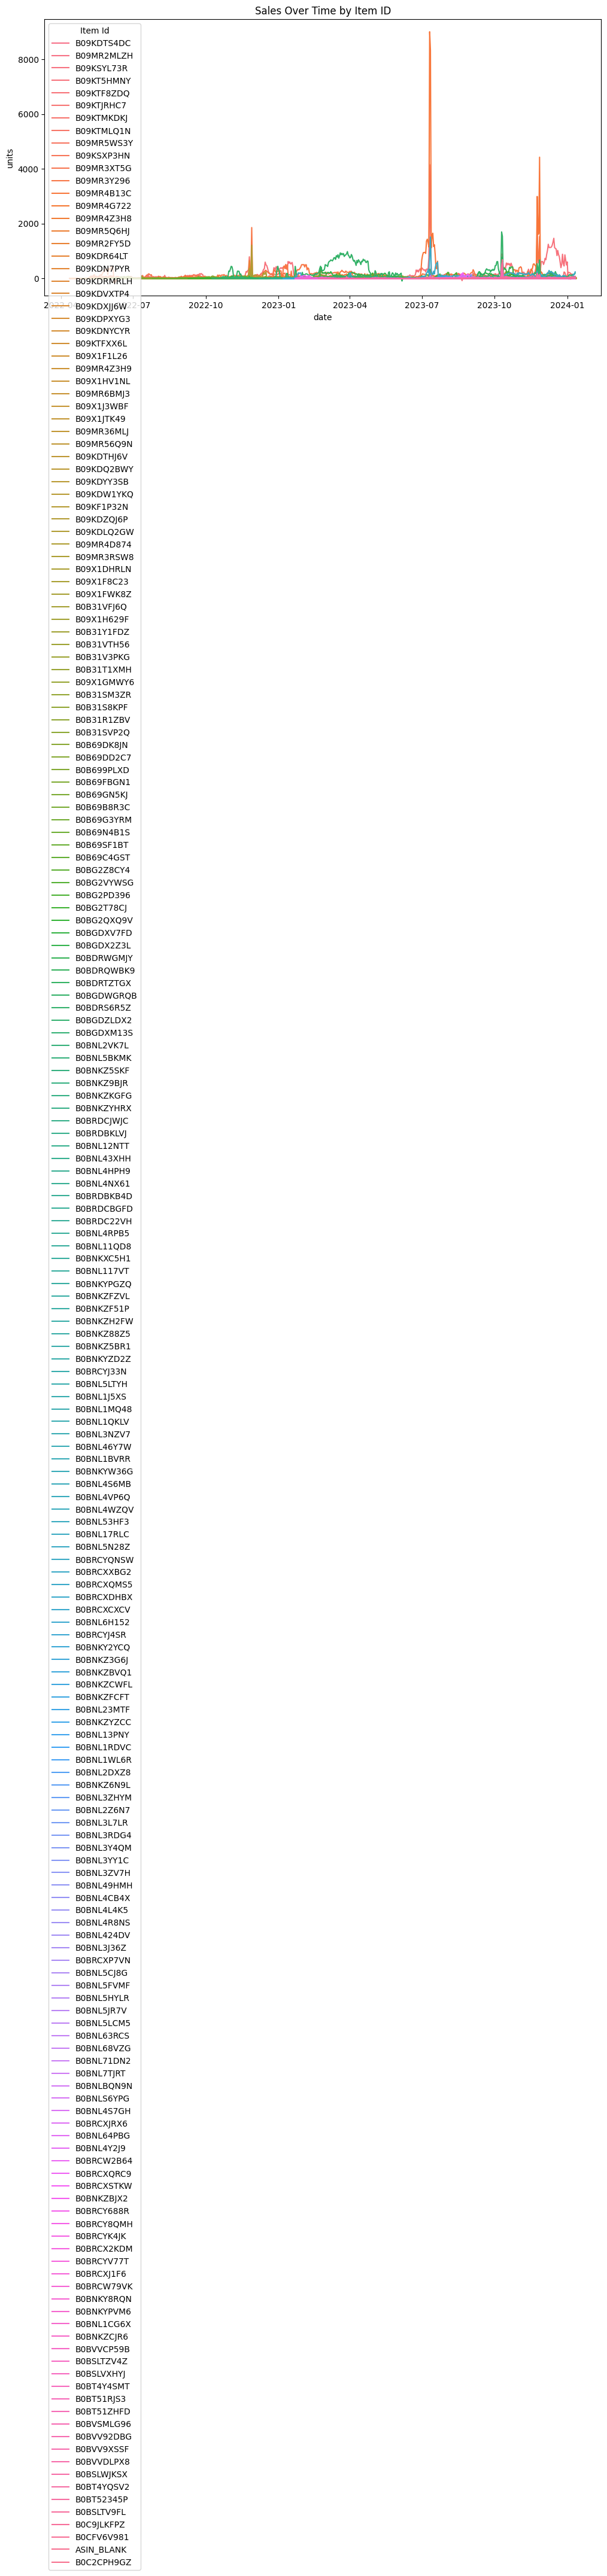

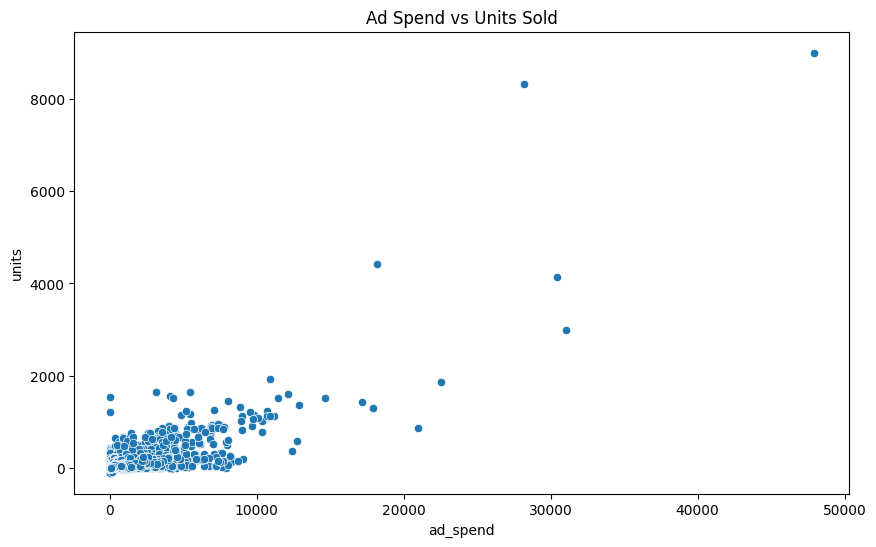

In [ ]:
#Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['units'], bins=50, kde=True)
plt.title('Distribution of Units Sold')
plt.show()

# Sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_df, x='date', y='units', hue='Item Id')
plt.title('Sales Over Time by Item ID')
plt.show()

# Ad Spend vs Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x='ad_spend', y='units')
plt.title('Ad Spend vs Units Sold')
plt.show()


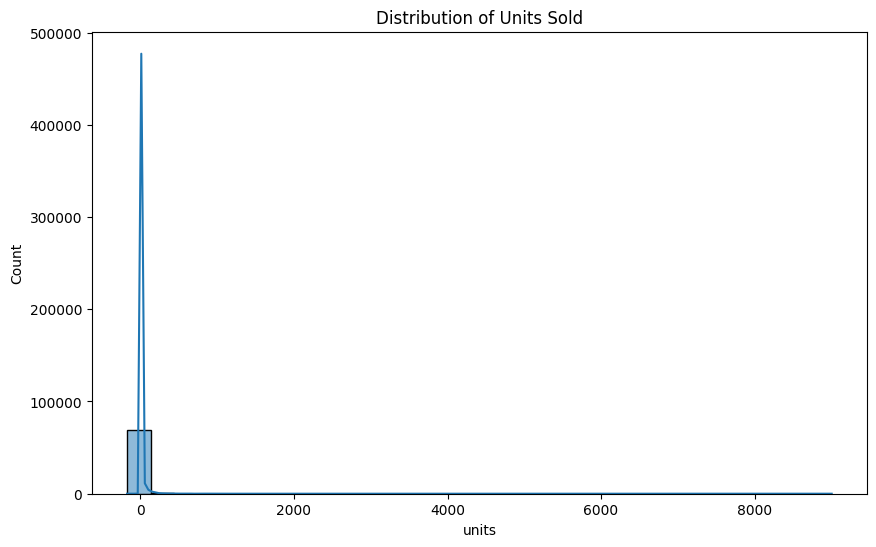

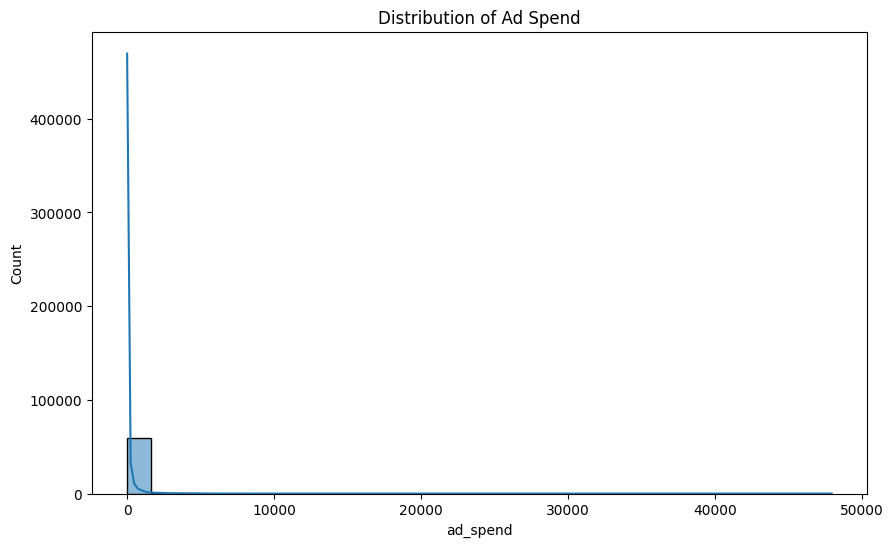

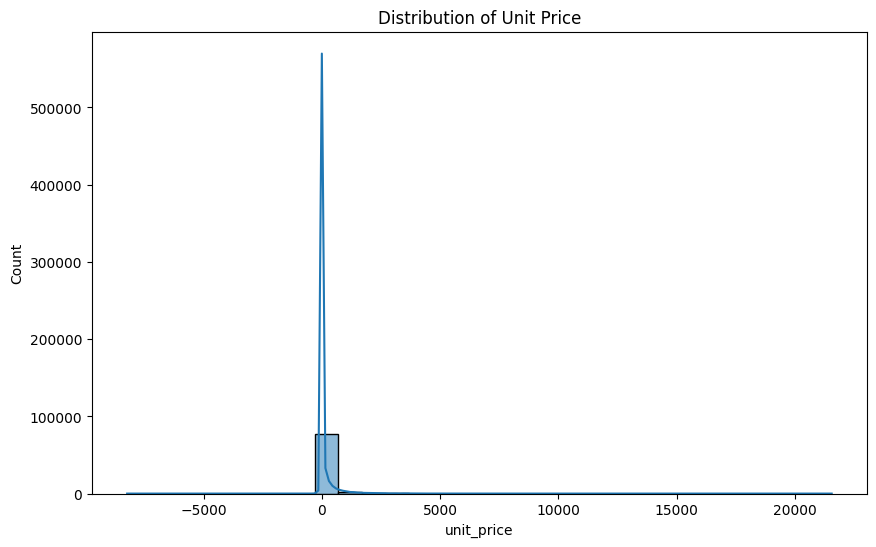

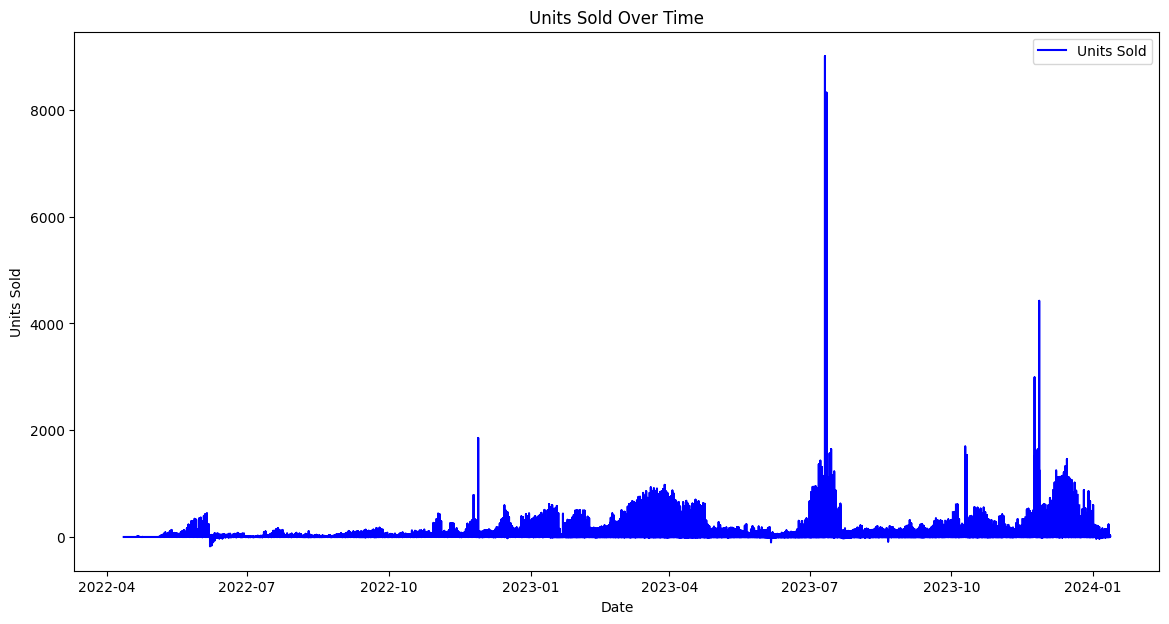

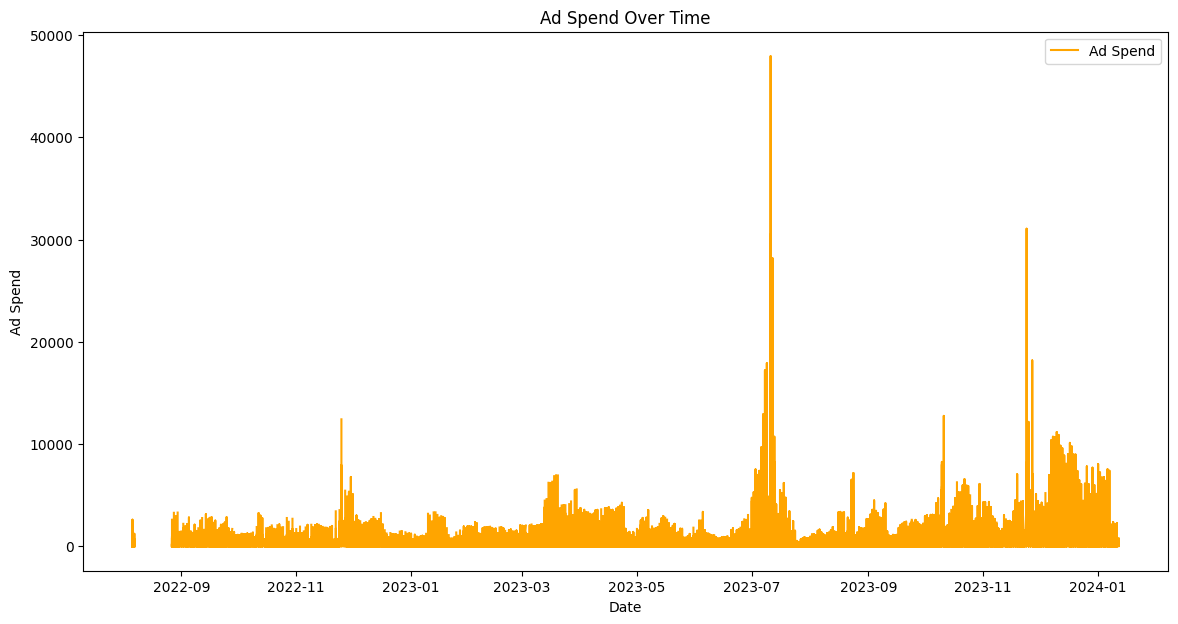

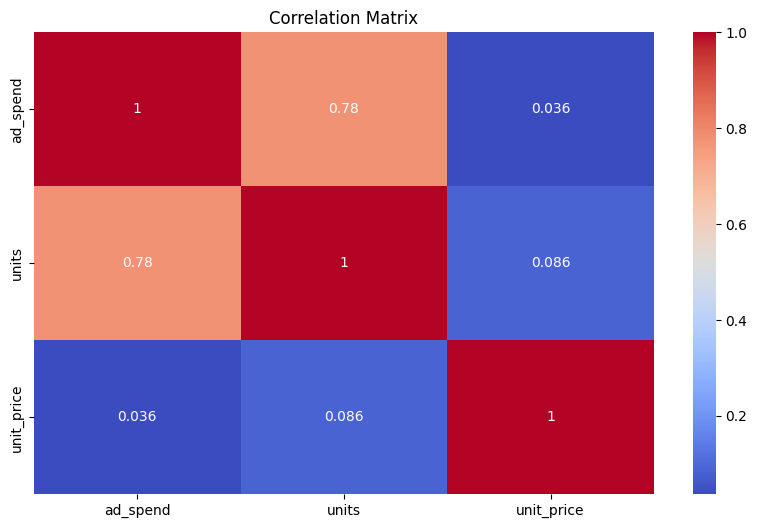

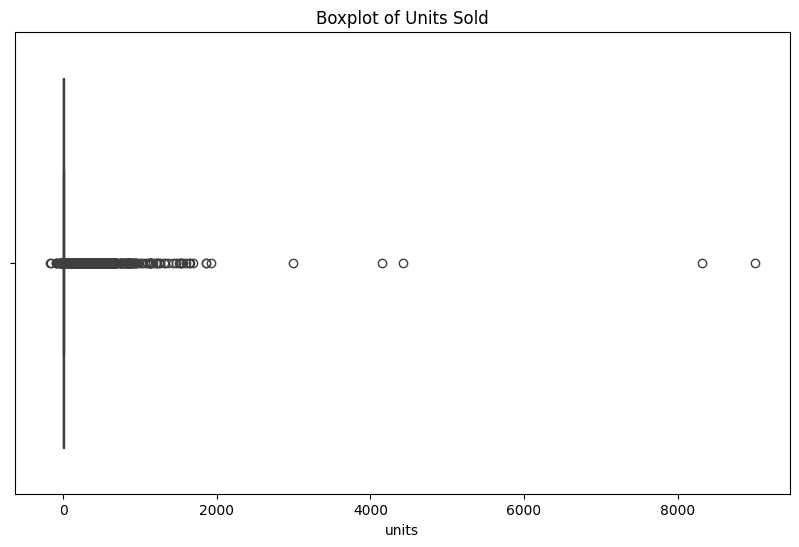

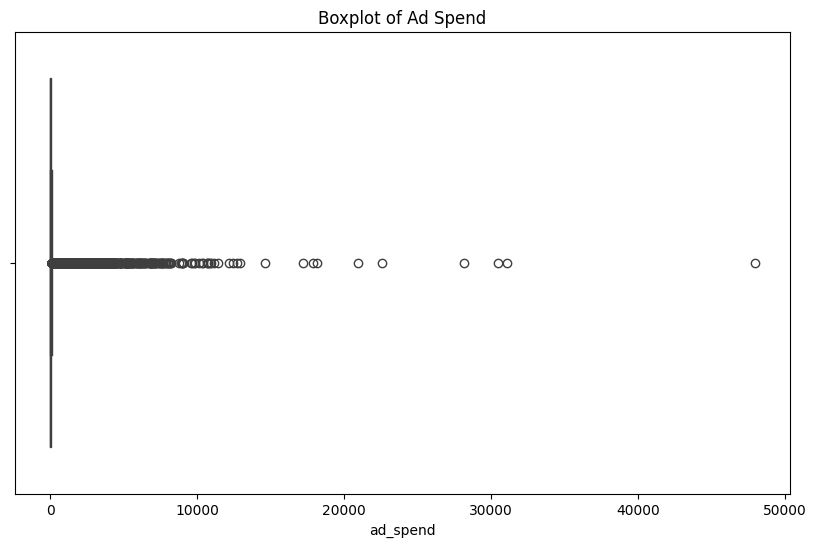

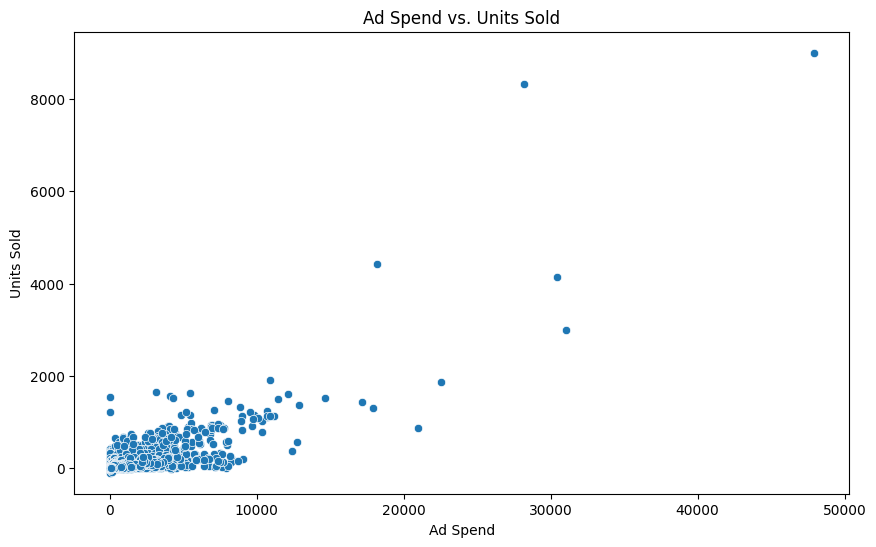

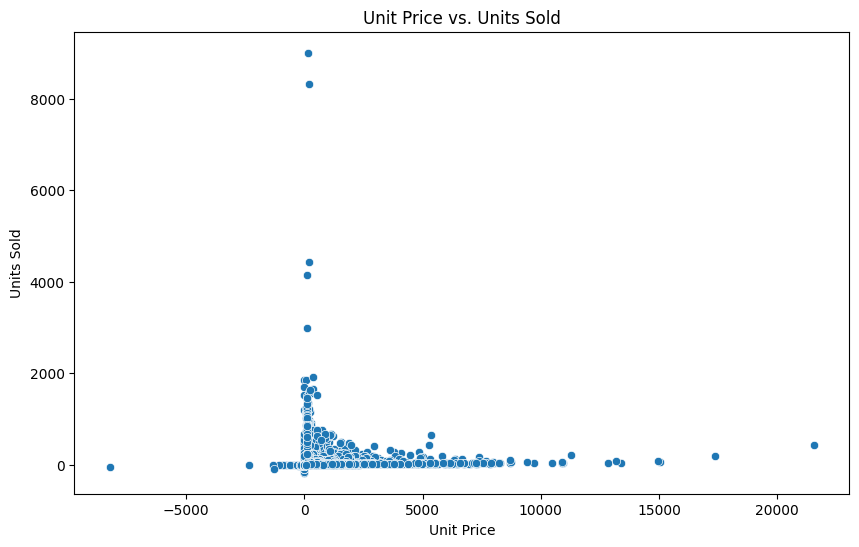

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Convert 'date' columns to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
# Plot distribution of 'units'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['units'].dropna(), bins=30, kde=True)
plt.title('Distribution of Units Sold')
plt.show()

# Plot distribution of 'ad_spend'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ad_spend'].dropna(), bins=30, kde=True)
plt.title('Distribution of Ad Spend')
plt.show()

# Plot distribution of 'unit_price'
plt.figure(figsize=(10, 6))
sns.histplot(train_df['unit_price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.show()

# 3. Time Series Analysis
# Plot units sold over time
plt.figure(figsize=(14, 7))
plt.plot(train_df['date'], train_df['units'], label='Units Sold', color='blue')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Units Sold Over Time')
plt.legend()
plt.show()

# Plot ad spend over time
plt.figure(figsize=(14, 7))
plt.plot(train_df['date'], train_df['ad_spend'], label='Ad Spend', color='orange')
plt.xlabel('Date')
plt.ylabel('Ad Spend')
plt.title('Ad Spend Over Time')
plt.legend()
plt.show()

#  correlation matrix
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

#correlation between features
corr_matrix = train_df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 5. Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['units'].dropna())
plt.title('Boxplot of Units Sold')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['ad_spend'].dropna())
plt.title('Boxplot of Ad Spend')
plt.show()

# 6. Feature Interactions
# Scatter plot of ad spend vs. units sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['ad_spend'], y=train_df['units'])
plt.xlabel('Ad Spend')
plt.ylabel('Units Sold')
plt.title('Ad Spend vs. Units Sold')
plt.show()

# Scatter plot of unit price vs. units sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['unit_price'], y=train_df['units'])
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.title('Unit Price vs. Units Sold')
plt.show()


In [ ]:
# Missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

ID                0
date              1
Item Id           1
Item Name       242
ad_spend      20760
anarix_id         1
units         11214
unit_price        1
dtype: int64
ID               0
date             0
Item Id          0
Item Name      344
ad_spend      1451
anarix_id        0
unit_price       0
dtype: int64


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pandas as pd

# Check columns and data types
print(train_df.dtypes)

# Handle missing values in target variable
print("Missing values in target variable (y):")
print(train_df['units'].isna().sum())

# Remove rows with missing target values
train_df_clean = train_df.dropna(subset=['units'])
X = train_df_clean.drop(columns=['units', 'date', 'ID'])
y = train_df_clean['units']

# Feature extraction from date
if 'month' not in X.columns:
    X['month'] = train_df_clean['date'].dt.month
    X['day_of_week'] = train_df_clean['date'].dt.dayofweek

# Define preprocessing for numerical and categorical data
num_features = ['ad_spend', 'unit_price', 'month', 'day_of_week']
cat_features = ['Item Name', 'Item Id', 'anarix_id']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ],
    remainder='passthrough'
)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)
svr_model = SVR()

# Create pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', xgb_model)])

svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', svr_model)])

# Train models
rf_pipeline.fit(X_train, y_train)
xgb_pipeline.fit(X_train, y_train)
svr_pipeline.fit(X_train, y_train)

# Evaluate models
rf_pred = rf_pipeline.predict(X_val)
xgb_pred = xgb_pipeline.predict(X_val)
svr_pred = svr_pipeline.predict(X_val)

# Calculate MSE
rf_mse = mean_squared_error(y_val, rf_pred)
xgb_mse = mean_squared_error(y_val, xgb_pred)
svr_mse = mean_squared_error(y_val, svr_pred)

print(f'Random Forest MSE: {rf_mse}')
print(f'XGBoost MSE: {xgb_mse}')
print(f'SVR MSE: {svr_mse}')

# Select the best model
best_model = rf_pipeline if rf_mse < xgb_mse and rf_mse < svr_mse else xgb_pipeline if xgb_mse < svr_mse else svr_pipeline


ID                    object
date          datetime64[ns]
Item Id               object
Item Name             object
ad_spend             float64
anarix_id             object
units                float64
unit_price           float64
dtype: object
Missing values in target variable (y):
11214
Random Forest MSE: 2401.6399313361367
XGBoost MSE: 4113.2214954301035
SVR MSE: 7520.542446392435


In [ ]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ad_spend', 'unit_price',
                                                   'month', 'day_of_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Item Name', 'Item Id',
                                                   'anarix_id'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the RandomForestRegressor within the pipeline
param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Re-evaluate with the tuned model
best_pred = best_model.predict(X_val)
best_mse = mean_squared_error(y_val, best_pred)
print(f'Tuned Model MSE: {best_mse}')


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
test_df.head()

,ID,date,Item Id,Item Name,ad_spend,anarix_id,unit_price
0,2024-07-01_B09KDR64LT,2024-07-01,B09KDR64LT,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
1,2024-07-01_B09KDTS4DC,2024-07-01,B09KDTS4DC,"NapQueen Elizabeth 8"" Gel Memory Foam Mattress...",NaN,NAPQUEEN,0.0
2,2024-07-01_B09KDTHJ6V,2024-07-01,B09KDTHJ6V,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
3,2024-07-01_B09KDQ2BWY,2024-07-01,B09KDQ2BWY,"NapQueen Elizabeth 12"" Gel Memory Foam Mattres...",NaN,NAPQUEEN,0.0
4,2024-07-01_B09KDYY3SB,2024-07-01,B09KDYY3SB,"NapQueen Elizabeth 10"" Gel Memory Foam Mattres...",101.72,NAPQUEEN,1094.5


In [ ]:
test_df.columns


Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id',
       'unit_price'],
      dtype='object')

In [ ]:
submission_df=pd.read_csv('/content/sample_submission.csv')
submission_df.head()

In [ ]:
import pandas as pd

# Ensure date column is in datetime format
test_df['date'] = pd.to_datetime(test_df['date'])

# Extract month and day_of_week from the date column
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek

# Inspect the test_df columns before dropping
print("Columns in test_df before dropping:", test_df.columns.tolist())

# Drop unnecessary columns
X_test = test_df.drop(columns=['date', 'ID'])

# Check for missing columns
expected_columns = ['month', 'day_of_week']
missing_columns = [col for col in expected_columns if col not in X_test.columns]
if missing_columns:
    raise KeyError(f"Missing columns in X_test: {missing_columns}")

# Predict using the best model
test_df['units'] = best_model.predict(X_test)

# Fill the submission file
submission_df['target'] = test_df['units']
submission_df.to_csv('submission.csv', index=False)

print("Submission file created.")


Columns in test_df before dropping: ['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'unit_price', 'month', 'day_of_week']
Submission file created.


In [ ]:
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Create the pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)])

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1   # Show progress
)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_pipeline = grid_search.best_estimator_

# Evaluate the best model
rf_pred = best_rf_pipeline.predict(X_val)
rf_mse = mean_squared_error(y_val, rf_pred)
print(f'Optimized Random Forest MSE: {rf_mse}')

# Cross-validation score
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(best_rf_pipeline, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
print(f'Random Forest Cross-Validation MSE: {-rf_scores.mean()}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# Prepare test data for prediction
X_test = test_df.drop(columns=['date', 'ID'])

# Predict using the best model
test_df['units'] = best_model.predict(X_test)

# Fill the submission file
submission_df['Target'] = test_df['units']
submission_df.to_csv('submission.csv', index=False)

print("Submission file created.")


Submission file created.


In [ ]:
from google.colab import files

# Download the file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
In this given task, predicting the forecast of sales with time series data is our primary goal. We began with the examination 
and investigation of the dataset by this we were able to find some trends and correlations in it that corresponded to sales trends 
and interaction between ad spend and units sold. This phase aims for handling missing values and the extraction of time-related features 
in the data preprocessing step, numeral variables will be standardized and getting categorical ones will be one-hot encoded. Three models 
were trained: Random Forest Regressor, XGBoost Regressor, and Support Vector Regressor. The way their performance was assessed was using the 
value mean squared error. The model which was chosen as the best one was "Random Forest" and then the hyperparameters were tuned with the help 
of GridSearchCV which is a famous cross-validation technique. Then, the final model was used to predict the sales of the test set and the results 
were saved for submission file. By seeing the trends of the data and by realizing that these models were capable of explaining the intricate relationships 
between features in a robust way, which is a suitable approach for solving the problem of forecasting the sales, we have chosen the method described.